In [1]:
from math_utils import *
from plot_utils import *
from low_rank_approximation import *
import itertools


test_dir = './data/first_test'
df_path = './data/first_test.csv'
counter = itertools.count(start=1)

In [2]:
# compute_global_stats_df(test_dir, df_path)

# Checking possible errors
The following are execution that measured only one iteration, they can be error. We will check if they are.

In [3]:
title = 'First Test Phase'
x='t_name'
y='m_name'
remove_outliers = 0
logscale = (False, False)
font_size = 15

fig_size = (1100, 700)

filter = {'n_iteration': lambda x: x == 1}
new_col = {'dataset': lambda x: x['c_name']}
remove_col = ['pc_name', 'date', 'c_name']

fig = plot_agg_global_df(x=x, y=y, remove_outliers=remove_outliers, dataframe_path=df_path,
                         filter=filter, new_col=new_col, remove_col = remove_col,
                         logscale=logscale, title=title + ' - 1 Iteration Runs', font_size = font_size,fig_size = fig_size
                   )
fig.write_html('./data/plots/' + title.replace(' ', '_').lower() + '_' + str(next(counter)) + '.html')

fig.show()

n_iteration has only one value: 1


the first 334-12 execution with only 1 iteration are all mnist matrices, few of them are 27x27 matrices, the others are 250x250 matrices obtained scaling the original 27x27 handwritten digit. They are for whure low ranak, so the convergence can be istantaneous if k is high enough.

In [4]:
# Assuming global_df is your DataFrame and it has a column named 'obj_fun'
global_df = load_global_df(df_path, filter)

# Sort the DataFrame by the 'obj_fun' column
sorted_df = global_df.sort_values(by='obj_fun_rel')

# Display the sorted DataFrame
sorted_df.tail(20)[['c_name', 'm_name', 't_name', 'obj_fun_rel']].reset_index()

index     c_name                  m_name                     t_name  \
0    1178      mnist      250x250_3_2594.png           100_rand_u_1e-08   
1    1504      mnist      250x250_5_6405.png          50_scaled_u_1e-08   
2    1612      mnist      250x250_6_4211.png            50_rand_u_1e-08   
3    1500      mnist      250x250_5_6405.png            50_rand_u_1e-08   
4    1616      mnist      250x250_6_4211.png          50_scaled_u_1e-08   
5    1184      mnist      250x250_3_2594.png  100_semi-orthogonal_1e-08   
6    1728      mnist      250x250_7_1496.png          50_scaled_u_1e-08   
7    1286      mnist      250x250_3_4044.png       50_sketching_g_1e-08   
8    1724      mnist      250x250_7_1496.png            50_rand_u_1e-08   
9    1244      mnist      250x250_3_4044.png      100_sketching_g_1e-08   
10    250   diagonal  eighen_bad_bad_100x100        1_sketching_g_1e-08   
11    248   diagonal  eighen_bad_bad_100x100        1_sketching_b_1e-08   
12    320   diagonal  eighen_bad_bad_250x250        1_sketching_g_1e-08   
13    318   diagonal  eighen_bad_bad_250x250        1_sketching_b_1e-08   
14   3218  symmetric      eighen_bad_100x100        1_sketching_g_1e-08   
15   3216  symmetric      eighen_bad_100x100        1_sketching_b_1e-08   
16    138   diagonal      eighen_bad_100x100        1_sketching_g_1e-08   
17    136   diagonal      eighen_bad_100x100        1_sketching_b_1e-08   
18    208   diagonal      eighen_bad_250x250        1_sketching_g_1e-08   
19   3286  symmetric      eighen_bad_250x250        1_sketching_b_1e-08   

     obj_fun_rel  
0   2.040362e-14  
1   2.247652e-14  
2   2.561424e-14  
3   2.580127e-14  
4   2.827889e-14  
5   1.110503e-13  
6   2.258475e-13  
7   3.082790e-13  
8   4.027416e-13  
9   4.346914e-13  
10  5.690215e-03  
11  5.690215e-03  
12  1.134277e-02  
13  1.134277e-02  
14  7.071123e-01  
15  7.071123e-01  
16  7.071123e-01  
17  7.071123e-01  
18  7.071292e-01  
19  7.071292e-01

as we see, the first 334-12 (considering the obj_fun value) are all good reconstruction of A, so they are not error

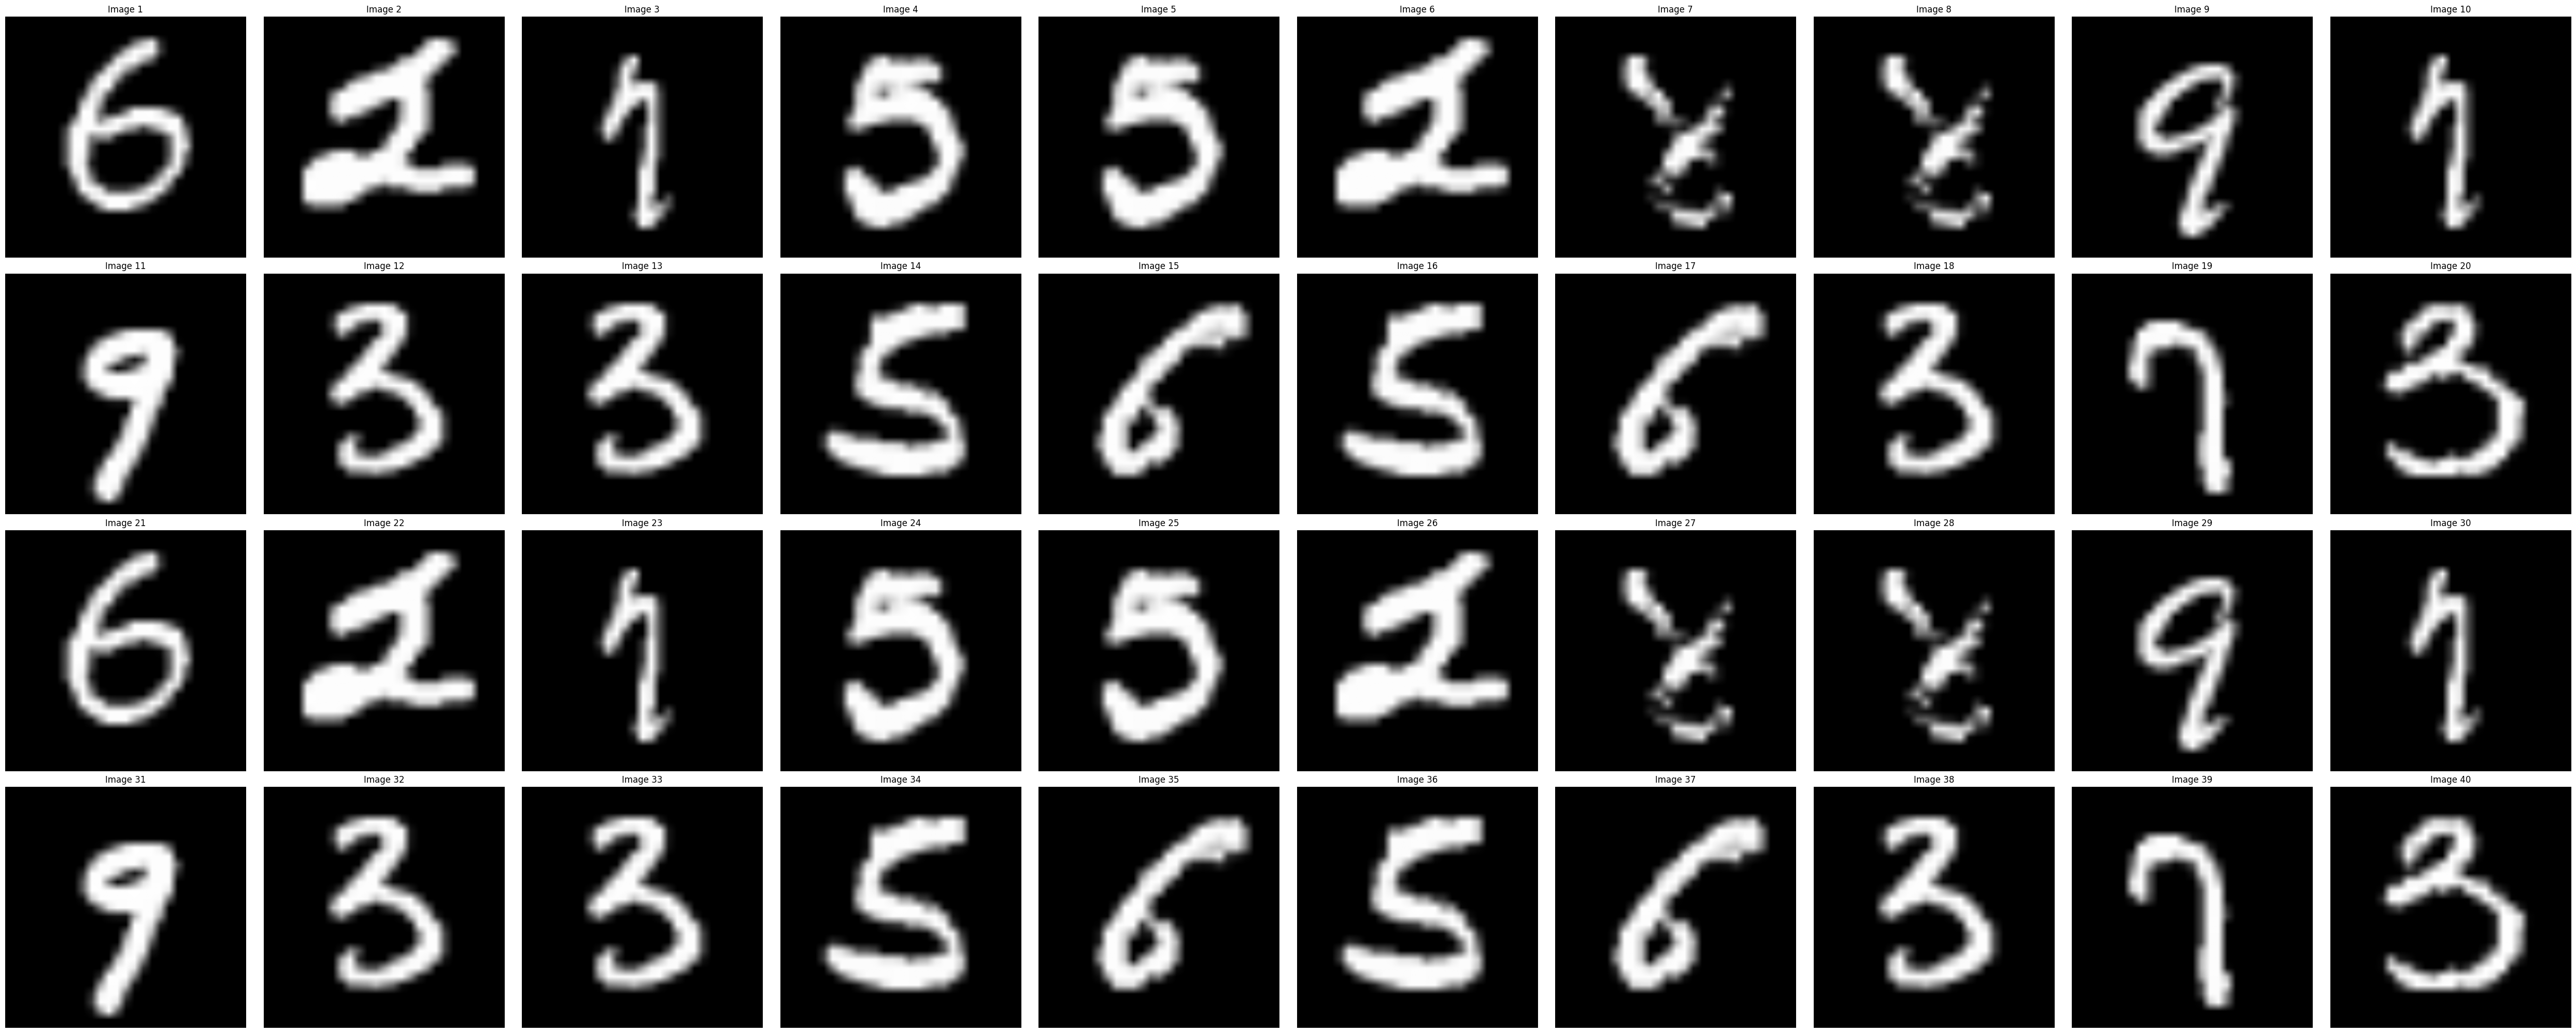

In [5]:
mats = [load_matrices(row['c_name'], row['m_name'], row['t_name'], test_dir=test_dir) for index, row in sorted_df.iloc[-32:-12].iterrows()]
show_grayscale_images([m['A'] for m in mats] + [m['U'] @ m['V'].transpose() for m in mats], 10)

In [6]:
# rerun(sorted_df.iloc[-2]['c_name'], sorted_df.iloc[-1]['m_name'], sorted_df.iloc[-2]['t_name'], changes={'k':10})

In [7]:
# rerun(sorted_df.iloc[-2]['c_name'], sorted_df.iloc[-2]['m_name'], sorted_df.iloc[-2]['t_name'], changes={'k':10})

after some testing it is evident that they are not error, are indeed good approximation computed with low k values, that generate an high objective function, now we will check other execution with low iteration > 1, not mnist and k > 1

In [8]:
x='t_name'
y='m_name'
remove_outliers = 0
logscale = (False, False)
font_size = 15

filter = {'n_iteration': lambda x: (x > 1) & (x < 10), 'c_name': lambda x: (x != 'mnist')}

fig = plot_agg_global_df(x=x, y=y, remove_outliers=remove_outliers, dataframe_path=df_path,
                         filter=filter, new_col=new_col, remove_col=remove_col,
                         logscale=logscale, title=title + ' - 2 to 9 Iteration Runs', font_size = font_size
                   )
fig.write_html('./data/plots/' + title.replace(' ', '_').lower() + '_' + str(next(counter)) + '.html')
fig.show()

k has only one value: 1


they all have k = 1 so for now we will assume that the algorithm always converge

# Analysis of Epsilon and Initialization Methods

In [9]:
x='dataset'
y='epsilon'
remove_outliers = 0
logscale = (False, False)
font_size = 15
fig_size = (1100, 500)


filter = {}

fig = plot_agg_global_df(x=x, y=y, remove_outliers=remove_outliers, dataframe_path=df_path,
                         filter=filter, new_col=new_col, remove_col=remove_col,
                         logscale=logscale, title=title + ' - Epsilon', font_size = font_size, fig_size= fig_size
                   )
fig.write_html('./data/plots/' + title.replace(' ', '_').lower() + '_' + str(next(counter)) + '.html')
fig.show()

m_name has too many categories
t_name has too many categories


In [10]:
x='n_iteration'
y='error_rel'
remove_outliers = 0
logscale = (True, True)
font_size = 15


filter = {'dataset': lambda x: x == 'horses'}

fig = plot_agg_global_df(x=x, y=y, remove_outliers=remove_outliers, dataframe_path=df_path,
                         filter=filter, new_col=new_col, remove_col=remove_col,
                         logscale=logscale, title=title + ' (Weizmann Horse Database) - Epsilon ', font_size = font_size
                   )
fig.write_html('./data/plots/' + title.replace(' ', '_').lower() + '_' + str(next(counter)) + '.html')
fig.show()

t_name has too many categories
dataset has only one value:  horses


In [11]:
x='dataset'
y='init_method'
remove_outliers = 0
logscale = (False, False)
font_size = 15


filter = {}

fig = plot_agg_global_df(x=x, y=y, remove_outliers=remove_outliers, dataframe_path=df_path,
                         filter=filter, new_col=new_col, remove_col = remove_col,
                         logscale=logscale, title=title + ' - Initialisation Method', font_size = font_size
                   )
fig.write_html('./data/plots/' + title.replace(' ', '_').lower() + '_' + str(next(counter)) + '.html')
fig.show()

m_name has too many categories
t_name has too many categories
